In [67]:
%matplotlib inline

In [73]:
import os
from sklearn.datasets import load_files

ROOT_FOLDER = '/home/theophile/TPS/Projects/sudoku_solver'
DATASET_FOLDER = 'datasets/chars74k'

TEST_SIZE = 0.2 # 20 %

# Find all files and their corresponding path

In [74]:
dataset = load_files(
    container_path=os.path.join(ROOT_FOLDER, DATASET_FOLDER),     
    load_content=False)
dataset

{'filenames': array(['/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k/5/img006-00316.png',
        '/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k/5/img006-00839.png',
        '/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k/2/img003-00770.png',
        ...,
        '/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k/5/img006-00796.png',
        '/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k/4/img005-00217.png',
        '/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k/3/img004-00701.png'],
       dtype='<U79'),
 'target_names': ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 'target': array([4, 4, 1, ..., 4, 3, 2]),
 'DESCR': None}

# Load images

In [75]:
import numpy as np
from skimage import io
from skimage.transform import resize

def load_images(dataset):
    images = []
    for file in dataset.filenames:
        img = io.imread(file)    
        resized_img = resize(img, (64, 64), anti_aliasing=True) # original size is 128x128
        images.append(resized_img)
    return np.array(images)

images = load_images(dataset)

# Create train & test splits

In [76]:
from sklearn.model_selection import train_test_split

labels = np.array([dataset.target_names[i] for i in dataset.target])

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    images, 
    labels, 
    test_size=0.2, 
    shuffle=True,
    random_state=42
)

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

# Export with joblib

In [77]:
import joblib

joblib_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
}

JOBLIB_OUTPUT = os.path.join(ROOT_FOLDER, 'datasets/chars74k_dataset.joblib')

joblib.dump(joblib_data, JOBLIB_OUTPUT)

['/home/theophile/TPS/Projects/sudoku_solver/datasets/chars74k_dataset.joblib']

# Display some infos

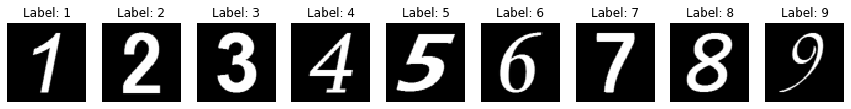

In [78]:
# use np.unique to get all unique values in the list of labels
labels, indexes = np.unique(y_train, return_index=True)
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)

for ax, label, idx in zip(axes, labels, indexes):
    digit = X_train[idx]    
    ax.imshow(digit, cmap='binary')
    ax.axis('off')
    ax.set_title("Label: " + str(label))

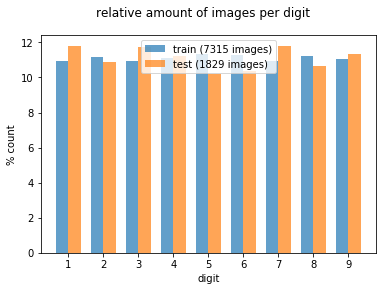

In [79]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
 
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
 
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
 
    xtemp = np.arange(len(unique))
 
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('digit')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of images per digit')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} images)'.format(len(y_train)),
    'test ({0} images)'.format(len(y_test))
]);